In [1]:
%%time
import numpy as np
import gc
import pandas as pd
import datetime
from matplotlib import pyplot as plt
from scipy.signal import find_peaks
from obspy import read
from obspy.core import UTCDateTime
from obspy.core.stream import Stream
from SeismicData import SeismicData

Wall time: 1min 5s


In [2]:
%%time
root_folder = "E:\\UDINA_2018\\miniSEED"
ud01_data_folder_path = root_folder+"\\UD01"
ud02_data_folder_path = root_folder+"\\UD02"
ud03_data_folder_path = root_folder+"\\UD03"
ud04_data_folder_path = root_folder+"\\UD04"

directions_data_folders = ["6d97e2", "6d97n2", "6d97z2"]

Wall time: 0 ns


In [3]:
%%time
def process_station_data(station_data_folder, file_num):
    import os 
    station_data = Stream()
    for direction in directions_data_folders:
        direction_stream = Stream()
        data_folder = station_data_folder+"\\"+direction
        for filename in (os.listdir(data_folder))[file_num:file_num+10]:
            input_stream=read(data_folder+"\\"+filename)
            direction_stream += input_stream
        direction_stream.merge(fill_value=0)
        station_data+=direction_stream
    return station_data

def square_sum (seismic_data):
    square_sum = list()
    for i, time in enumerate(seismic_data.times):
        summ = np.float64(0)
        for trace in seismic_data.traces:
            summ+=trace[i]*trace[i]
        summ /= seismic_data.alive_traces_count[i]
        square_sum.append((time, summ))
    return square_sum

def union_close_times(times):
    united_times = []
    for i in range(len(times)):
        if ((times[i].datetime - times[i-1].datetime).total_seconds())//60 > 3:
            united_times.append(times[i])
        else:
            continue
    
    united_times.append(times[len(times)-1])
    return united_times
def moving_average(a, n):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

Wall time: 0 ns


file number: 0


C:\ProgramData\Anaconda3\lib\site-packages\obspy\signal\detrend.py:31: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(data.dtype, float):


Station data preprocessing...
max trace = .6D97..HHE | 2018-05-06T00:00:00.000000Z - 2018-05-06T09:59:59.990000Z | 100.0 Hz, 3600000 samples
max trace times = [UTCDateTime(2018, 5, 6, 0, 0) UTCDateTime(2018, 5, 6, 0, 0, 0, 10000)
 UTCDateTime(2018, 5, 6, 0, 0, 0, 20000) ...
 UTCDateTime(2018, 5, 6, 9, 59, 59, 970000)
 UTCDateTime(2018, 5, 6, 9, 59, 59, 980000)
 UTCDateTime(2018, 5, 6, 9, 59, 59, 990000)]
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing.

C:\ProgramData\Anaconda3\lib\site-packages\obspy\io\mseed\core.py:772: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


file number: 10
Station data preprocessing...
max trace = .6D97..HHE | 2018-05-06T10:00:00.000000Z - 2018-05-06T19:59:59.990000Z | 100.0 Hz, 3600000 samples
max trace times = [UTCDateTime(2018, 5, 6, 10, 0) UTCDateTime(2018, 5, 6, 10, 0, 0, 10000)
 UTCDateTime(2018, 5, 6, 10, 0, 0, 20000) ...
 UTCDateTime(2018, 5, 6, 19, 59, 59, 970000)
 UTCDateTime(2018, 5, 6, 19, 59, 59, 980000)
 UTCDateTime(2018, 5, 6, 19, 59, 59, 990000)]
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finishe

Trace preprocessing finished
Calculating number of alive traces...
Calculating number of alive traces finished
Station data preprocessing finished
	len peaks = 68
[UTCDateTime(2018, 5, 8, 14, 50, 52, 210000), UTCDateTime(2018, 5, 8, 14, 54, 16, 230000), UTCDateTime(2018, 5, 8, 14, 54, 16, 230000)]
file number: 70
Station data preprocessing...
max trace = .6D97..HHN | 2018-05-08T22:00:00.000000Z - 2018-05-09T07:59:59.990000Z | 100.0 Hz, 3600000 samples
max trace times = [UTCDateTime(2018, 5, 8, 22, 0) UTCDateTime(2018, 5, 8, 22, 0, 0, 10000)
 UTCDateTime(2018, 5, 8, 22, 0, 0, 20000) ...
 UTCDateTime(2018, 5, 9, 7, 59, 59, 970000)
 UTCDateTime(2018, 5, 9, 7, 59, 59, 980000)
 UTCDateTime(2018, 5, 9, 7, 59, 59, 990000)]
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preproce

MemoryError: 

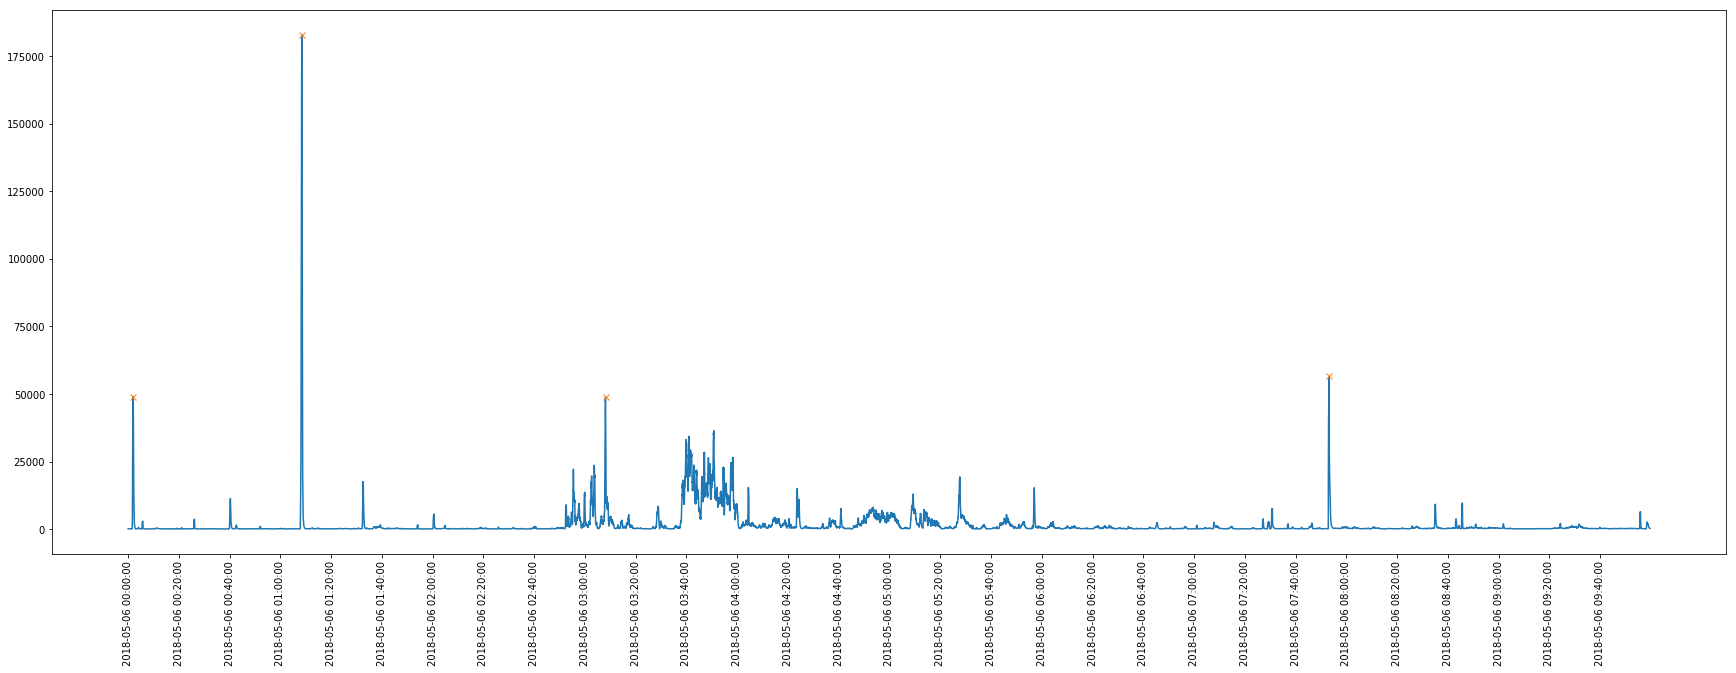

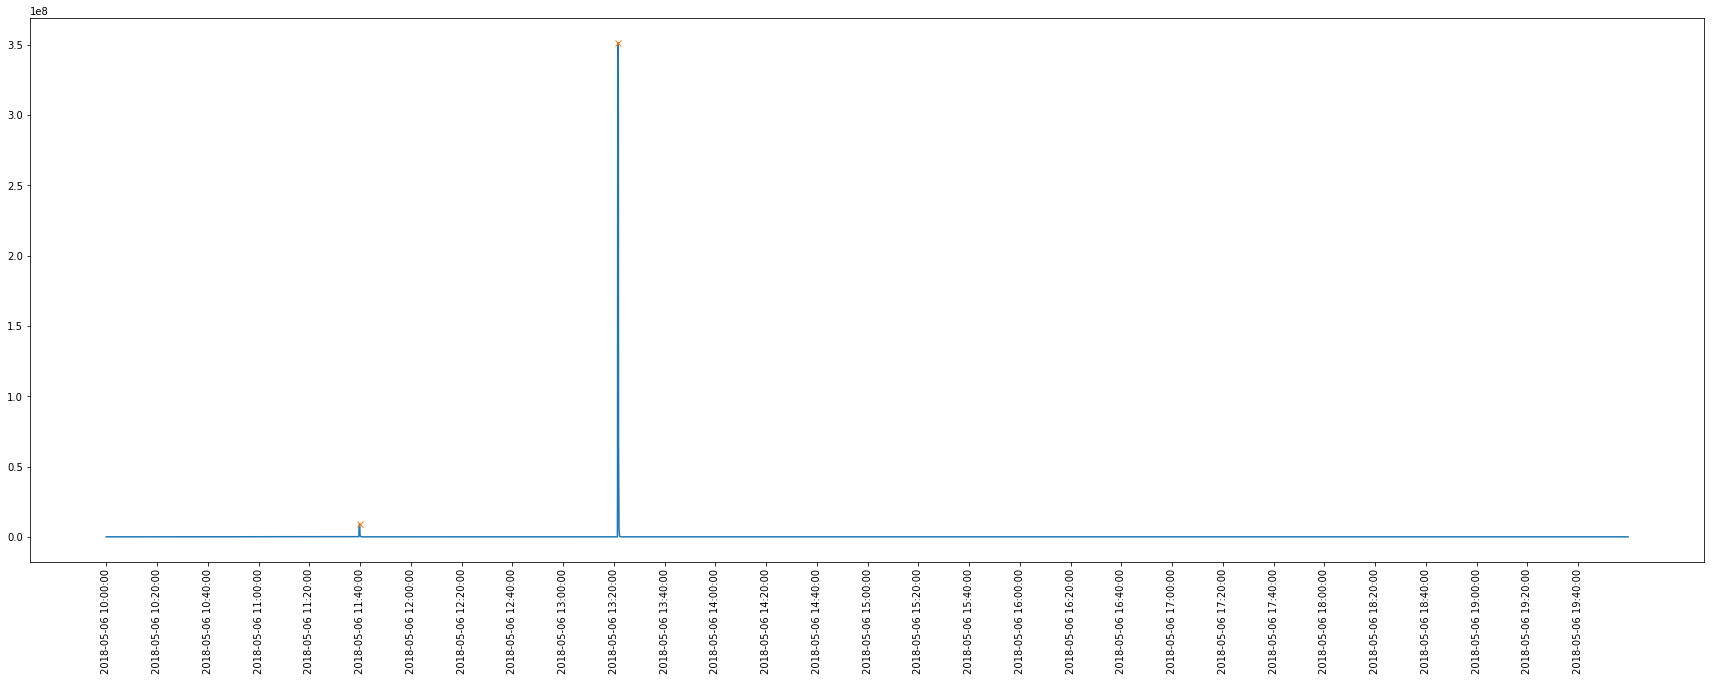

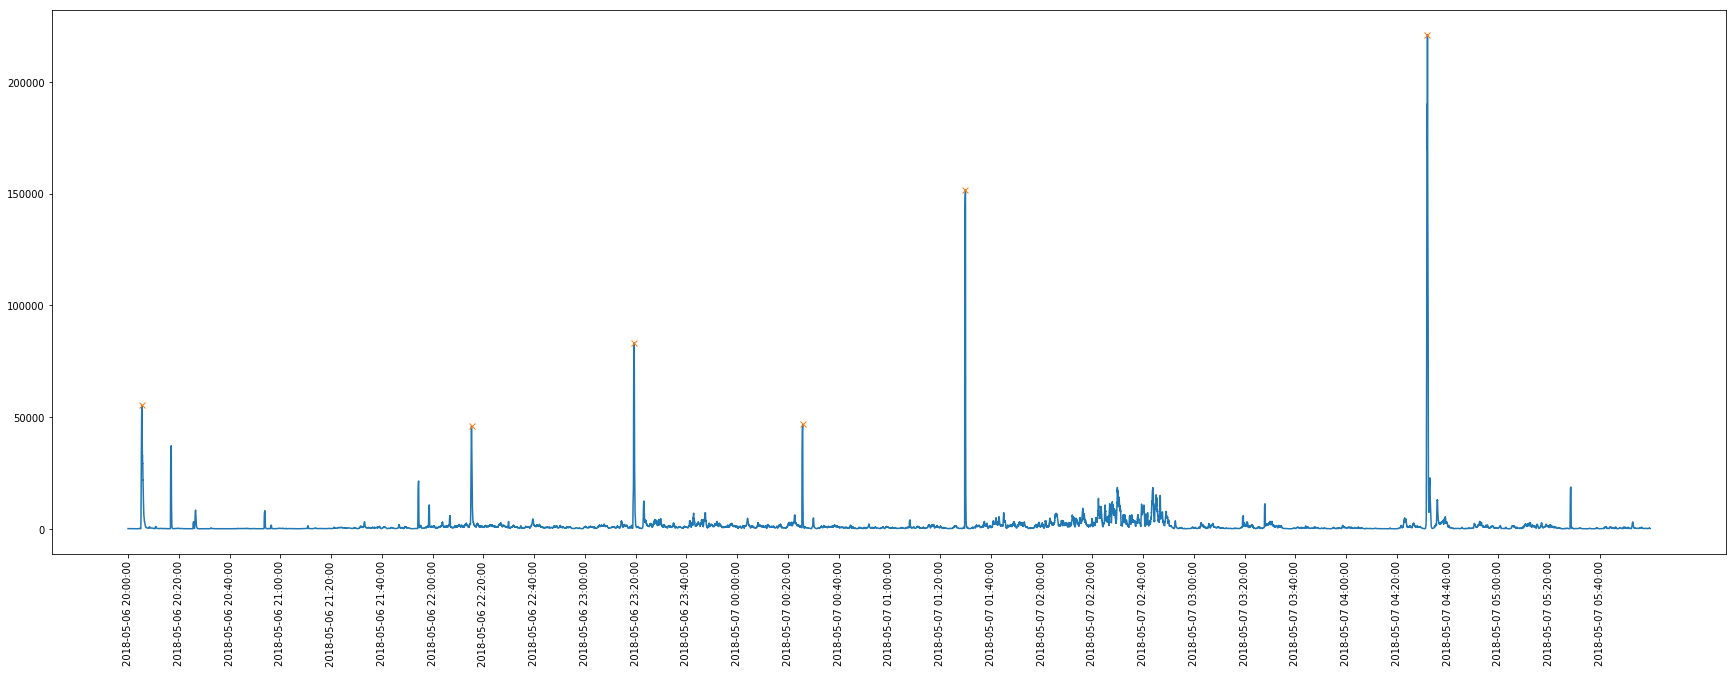

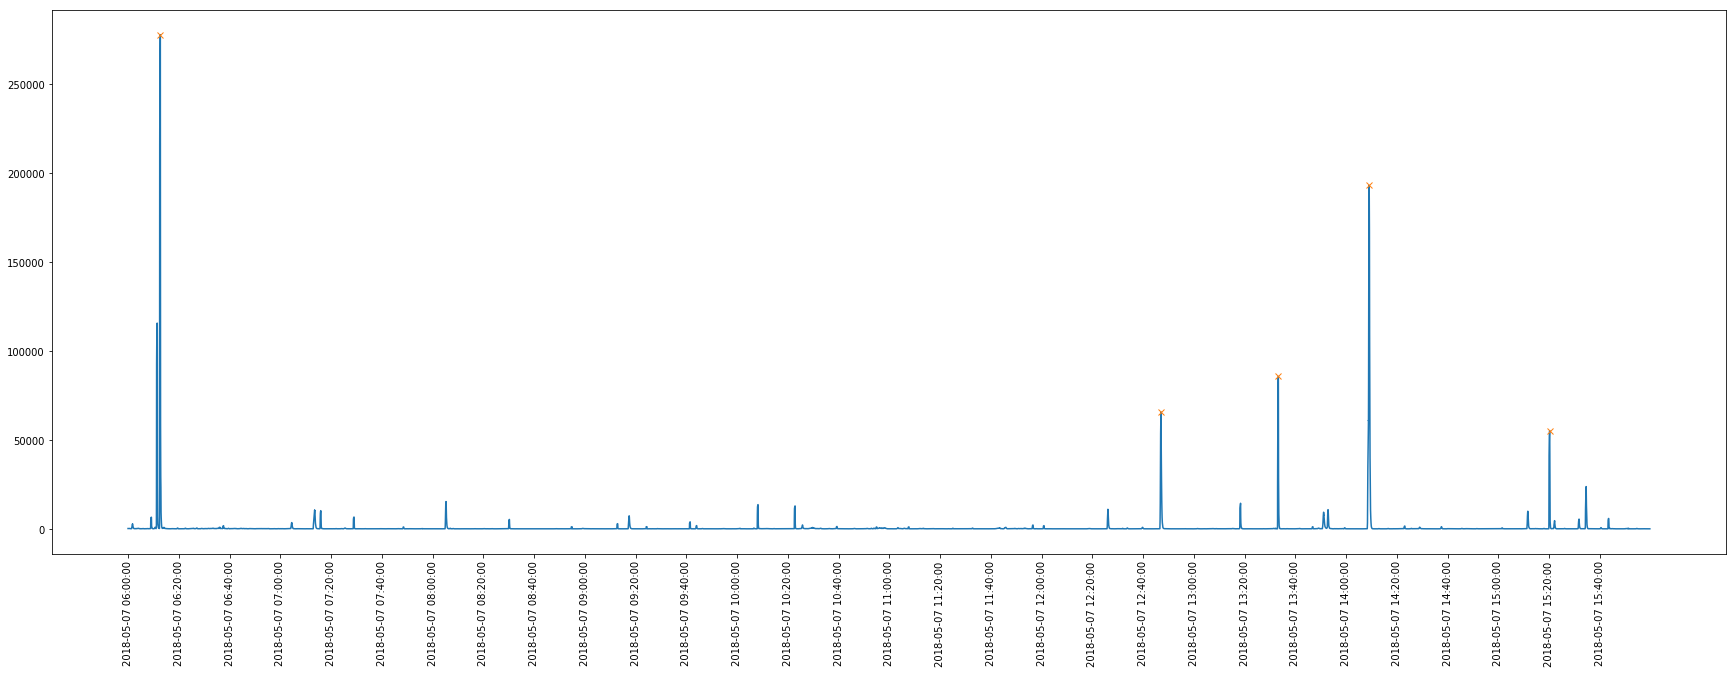

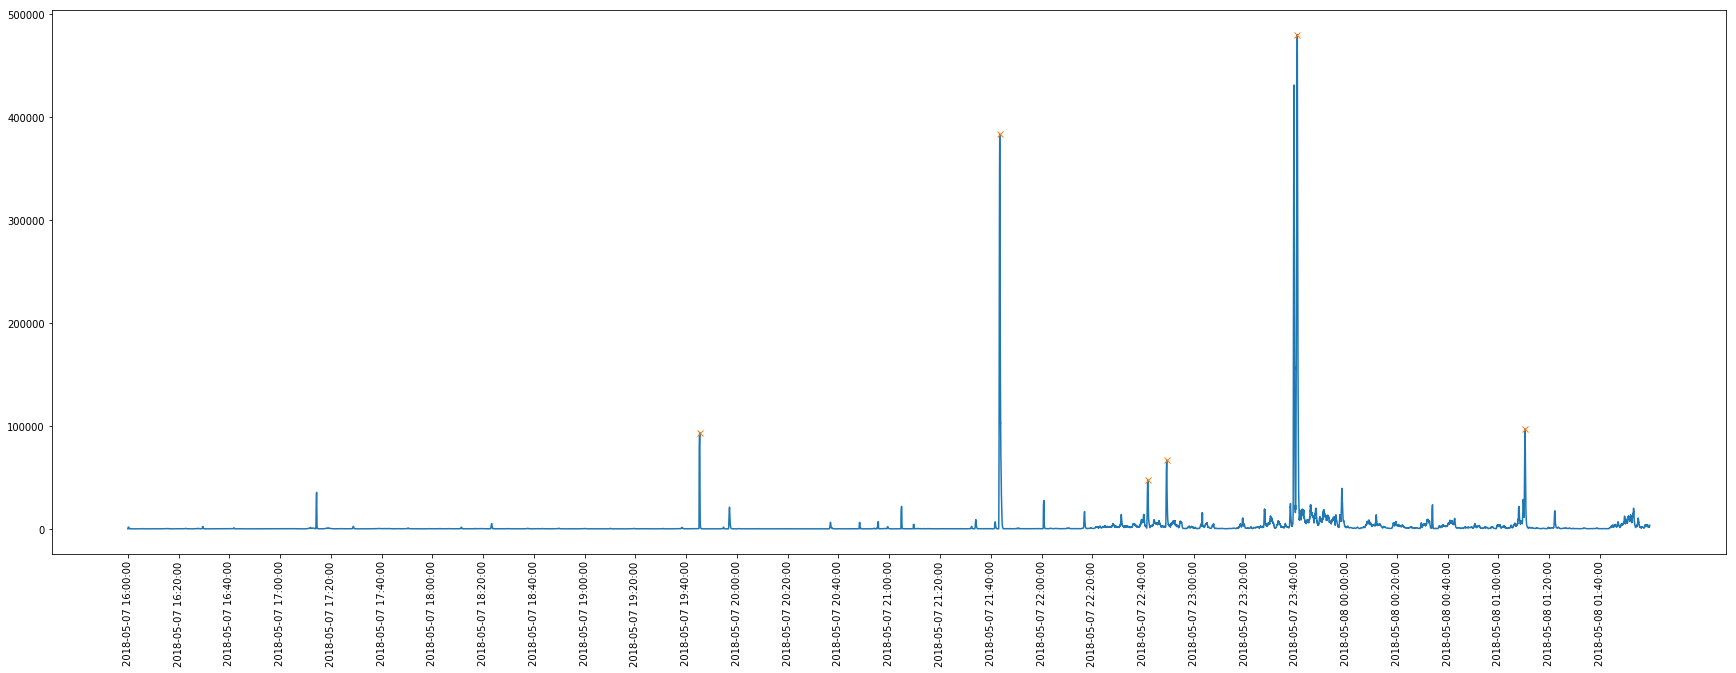

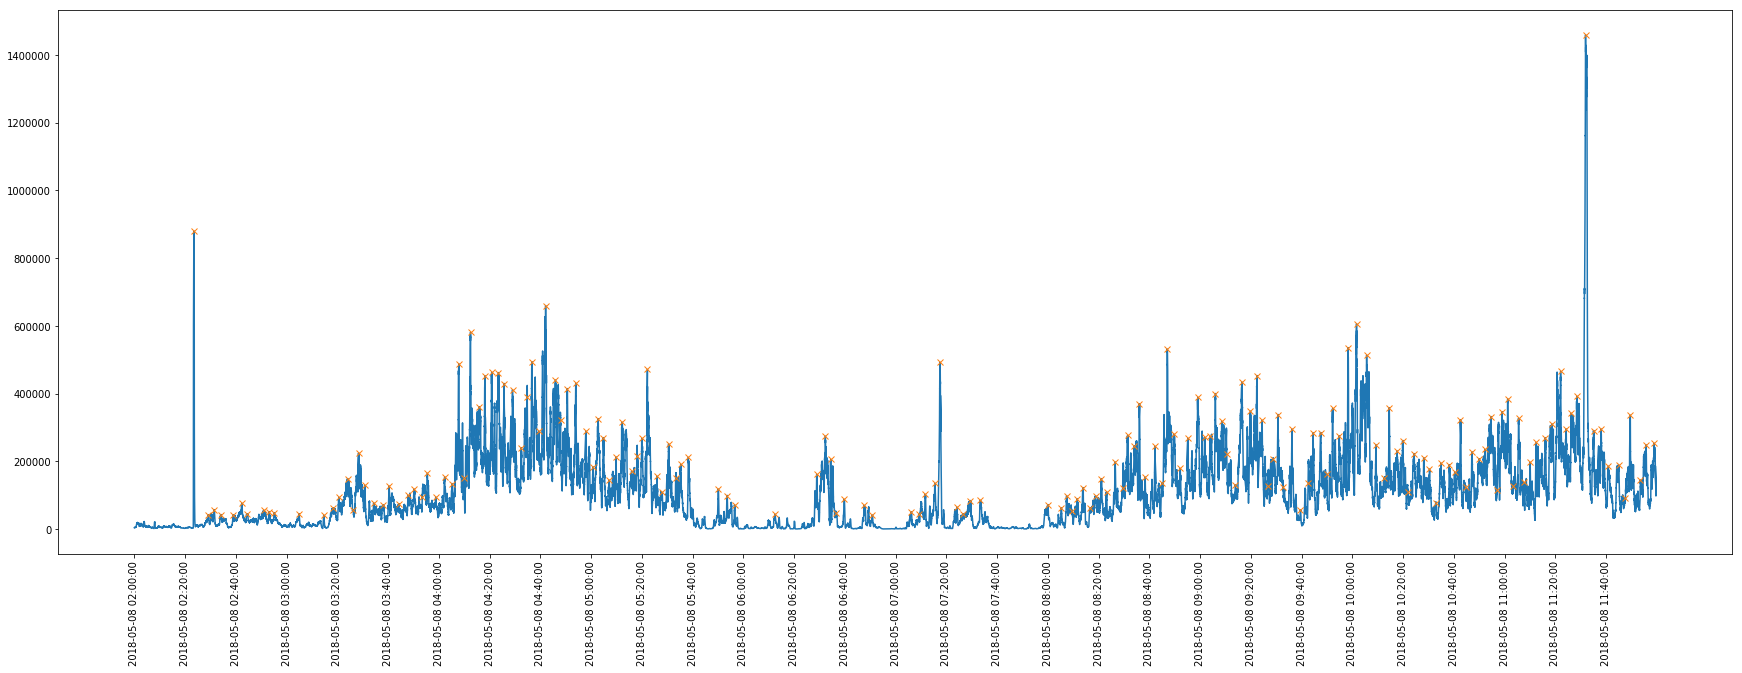

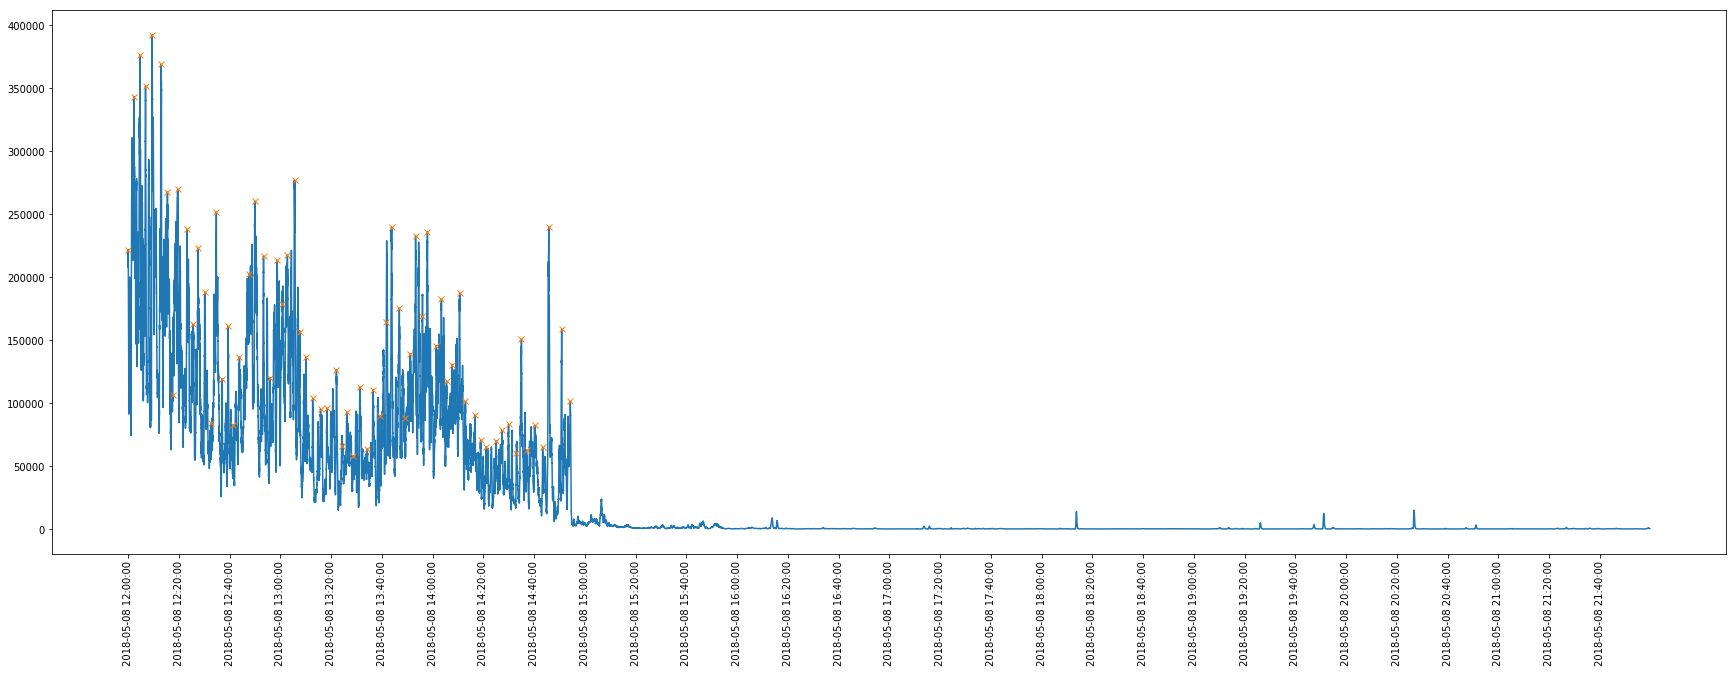

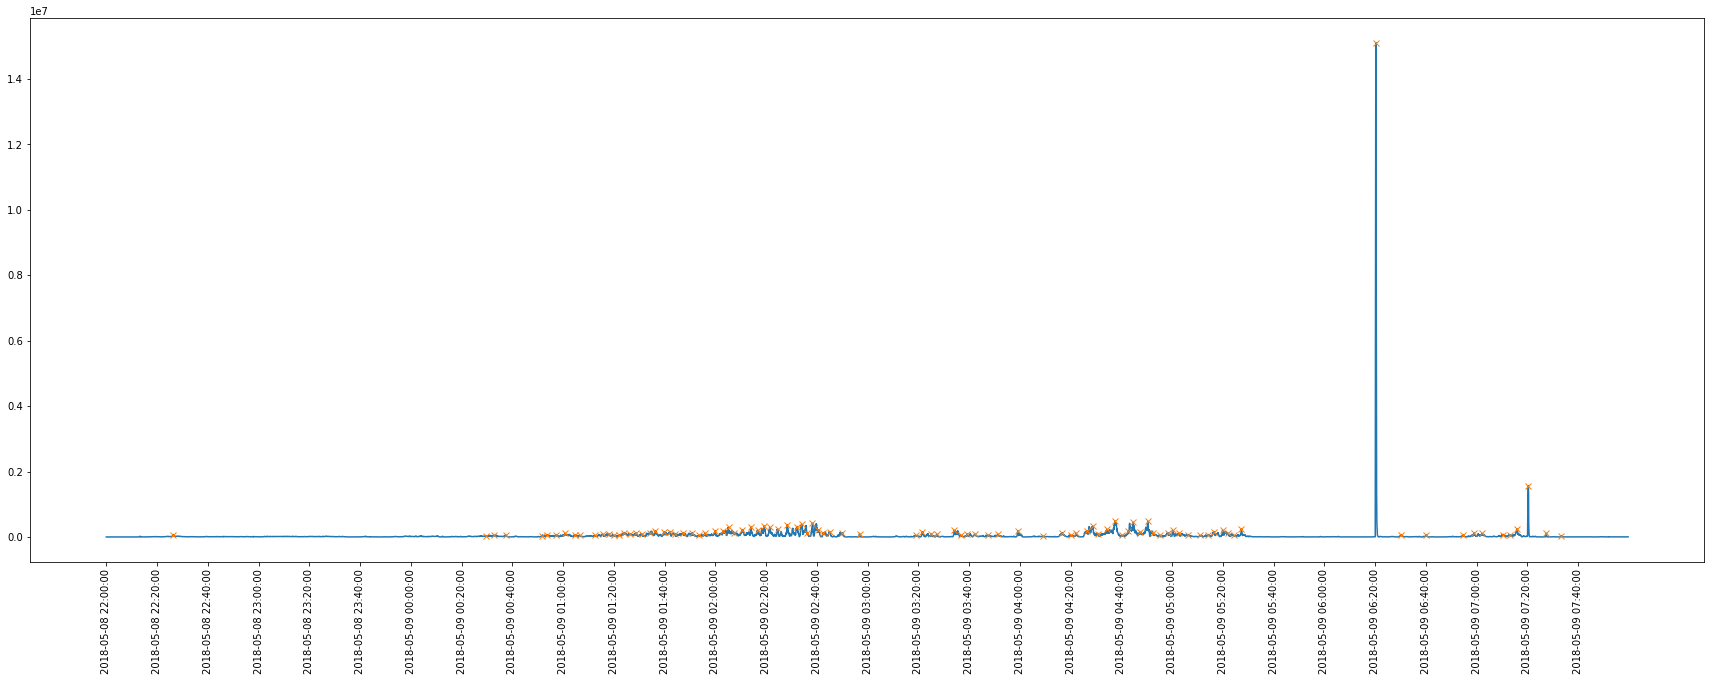

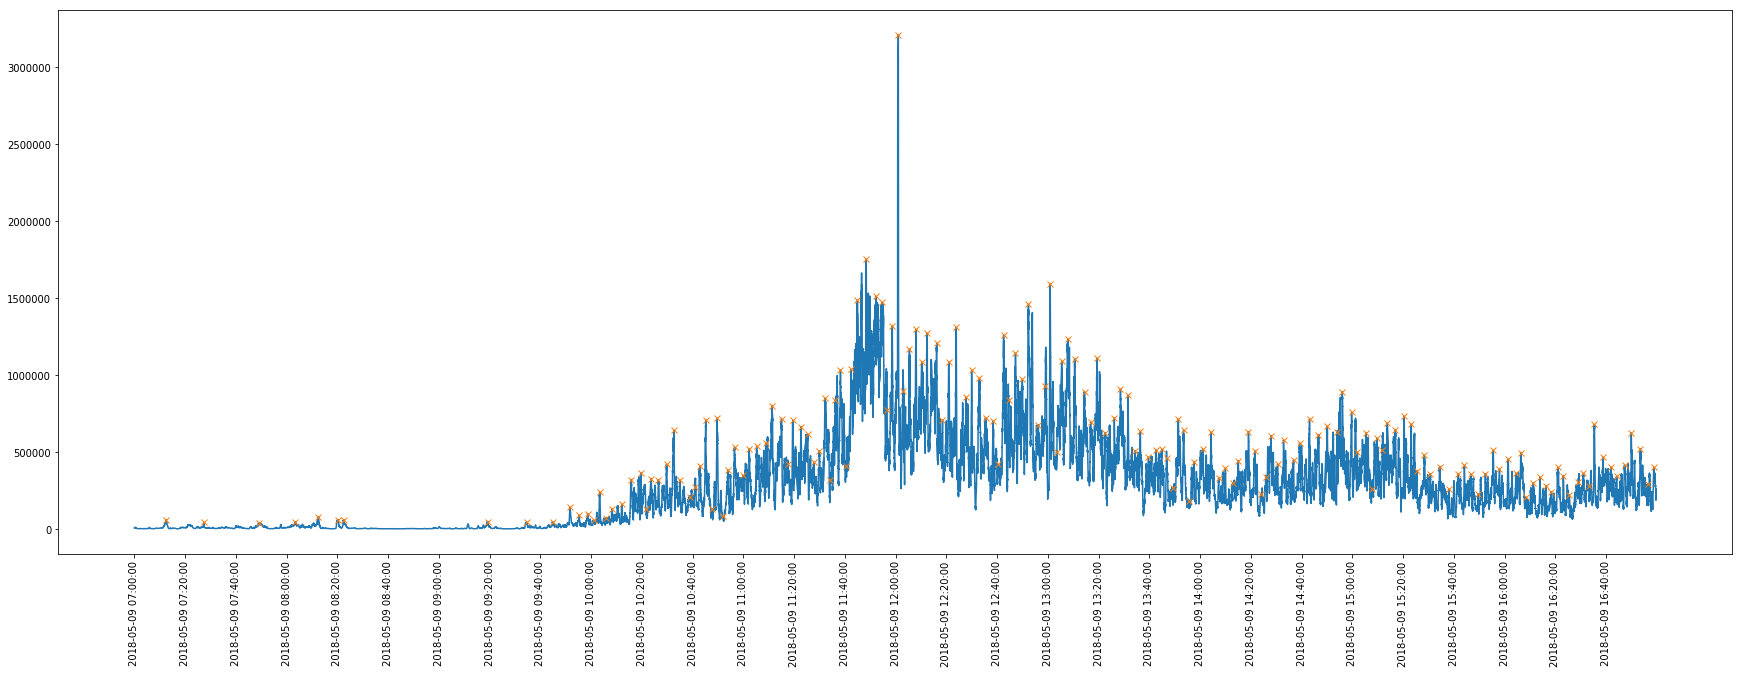

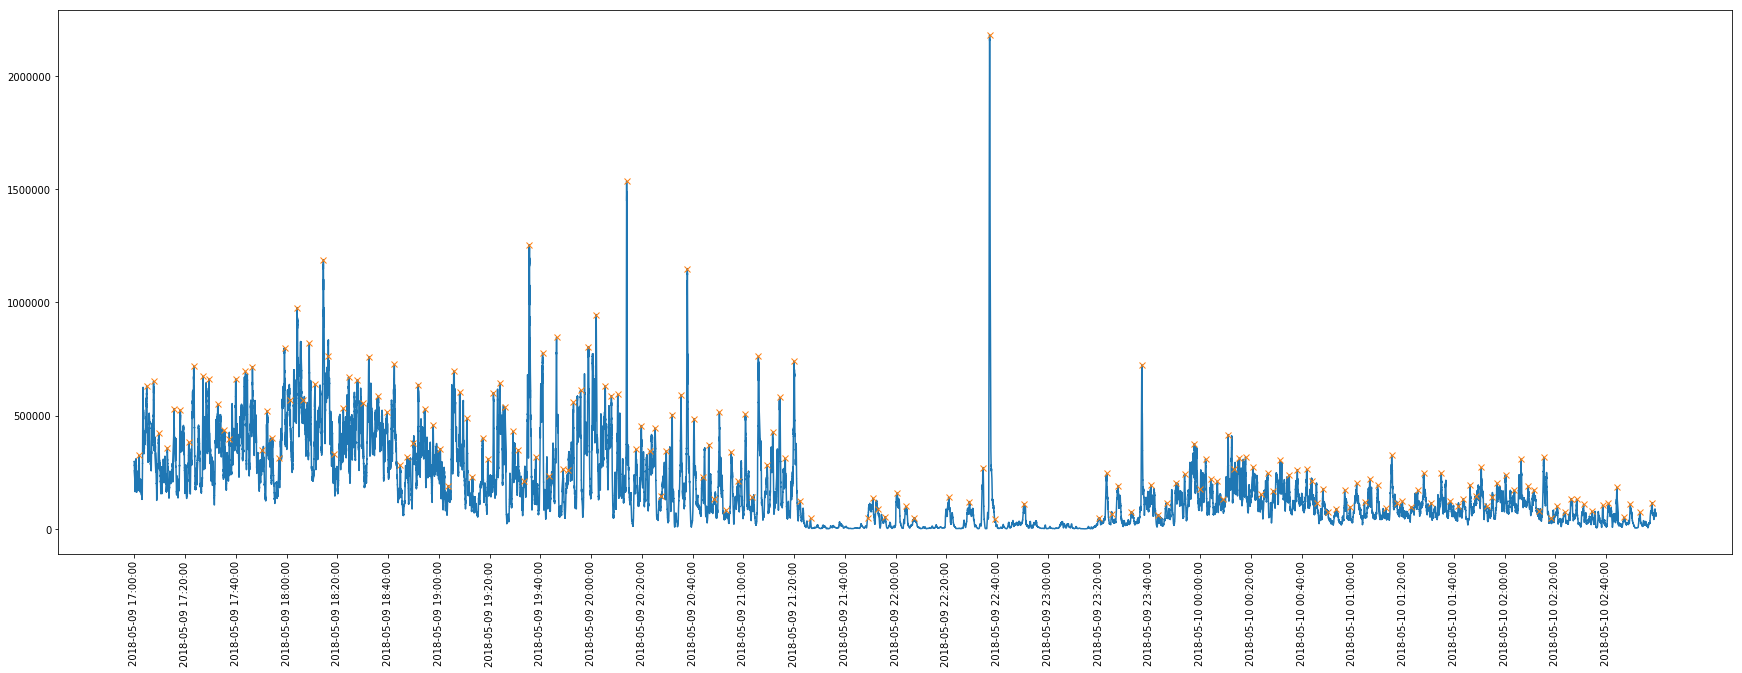

In [4]:
%%time
file_num = 0
while file_num < 1400:
    gc.collect()
    print('file number: {0}'.format(file_num))
    station_data = process_station_data(ud01_data_folder_path, file_num)
    station_data += process_station_data(ud02_data_folder_path, file_num)
    station_data += process_station_data(ud03_data_folder_path, file_num)
    station_data += process_station_data(ud04_data_folder_path, file_num)

    min_filtering_frequency = 2
    max_filtering_frequency = 6
    station_data = station_data.detrend()
    station_data = station_data.filter("bandpass", freqmin=min_filtering_frequency,freqmax = max_filtering_frequency)
    
    seismic_data = SeismicData(station_data)
    squareSum = square_sum(seismic_data)
    x = list()
    y = list()

    for item in squareSum:
        x.append(item[0])
        y.append(item[1])

    m=2000
    x_av = x.copy()
    y_av = moving_average(y.copy(), m)
    x_av = np.asarray(x_av[:len(y_av)])
    
    peaks, _ = find_peaks(y_av, height=0.04e6, distance=12000)
    print('\tlen peaks = {0}'.format(len(peaks)))
    if len(peaks) > 0 and len(peaks) < 200:
        lpeaks = np.asarray(peaks)
        xticks = [x.datetime.strftime("%Y-%m-%d %H:%M:%S") for x in  x_av][::120000]
        plt.figure(figsize=(30,10))
        plt.plot(x_av,y_av)
        plt.plot(x_av[lpeaks], y_av[lpeaks], "x")
        plt.xticks(x_av[::120000], xticks, rotation=90)
        plt.savefig('plots\\plot_peaks_{0}.png'.format(datetime.datetime.now().strftime("%Y%m%d%H%M%S")))
        times = station_data[0].times("utcdatetime")
        peaks_times = times[lpeaks]
        filtered_times = union_close_times(peaks_times)
        filtered_times.append(peaks_times[len(peaks_times)-1])
        print(filtered_times)
        for i in range(len(filtered_times)):
            f_time = filtered_times[i]
            ind = np.where(times==f_time)[0][0]
            startInd = ind - 3000
            endInd = ind + 30000
            if endInd > len(times):
                endInd = len(times) - 1
            copy = station_data.copy()
            
            trimed = copy.trim(starttime=times[startInd], endtime=times[endInd])
            trimed.write("automatic_triggers_long_20190310\\trigger—{0}.msd".format(str(f_time).replace(":", "").replace("-", "").replace(".", "")), format="MSEED")
            
            startInd = ind - 1500
            endInd = ind + 3000
            if endInd > len(times):
                endInd = len(times) - 1
            copy = station_data.copy()
            trimed = copy.trim(starttime=times[startInd], endtime=times[endInd])
            trimed.write("automatic_triggers_20190310\\trigger—{0}.msd".format(str(f_time).replace(":", "").replace("-", "").replace(".", "")), format="MSEED")
            
        file_num += 10
    else:
        file_num += 10
       

